# Cross Validation and Hyperparameter Search

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

## Cross Validation

In order to avoid caveats in the train/test split method, we can perform something called **cross validation**. It’s very similar to **train/test split**, but it’s applied to more subsets. Meaning, `we split our data into k subsets, and train on k-1 one of those subset`. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

**Cross-validation** is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data. It also solves the problem of arbitrary split of data to train and test datasets.

<img src="images/cross-validation2.png" alt="" style="width: 600px;"/>

There are a bunch of cross validation methods, for example: **K-Folds Cross Validation** and **Leave One Out Cross Validation (LOOCV)**.

## K-Folds Cross Validation

In **K-Folds Cross Validation** we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

<img src="images/cross-validation3.png" alt="" style="width: 600px;"/>


In [5]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [7]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### 5-fold cross-validation

In this exercise, you will practice **5-fold cross validation** on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses `R2` as the metric of choice for **regression**. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

<img src="images/cross-validation.png" alt="" style="width: 600px;"/>

**Cross validation** is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes.

In [22]:
import pandas as pd
import numpy as np

path = 'data/dc18/'

# Read the CSV file into a DataFrame: df
df = pd.read_csv(path+'gapminder.csv')
X = np.array(df.drop('life', axis=1).values)
y = np.array(df.life.values)

In [27]:
X.shape, y.shape

((139, 8), (139,))

In [23]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {} <- R2 mean value".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793232 <- R2 mean value


In [24]:
%timeit cross_val_score(reg, X, y, cv=3)

2.06 ms ± 88.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit cross_val_score(reg, X, y, cv=10)

6.39 ms ± 216 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


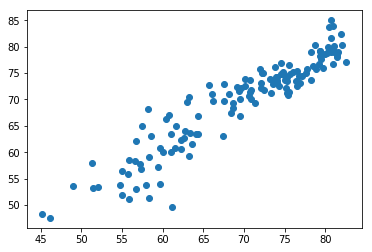

In [32]:
# Make cross validated predictions
predictions = cross_val_predict(reg, X, y, cv=6)
plt.scatter(y, predictions)
plt.show();

## Leave One Out Cross Validation (LOOCV)

In this type of cross validation, `the number of folds (subsets) equals to the number of observations` we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. If the dataset is big, it would most likely be better to use a different method, like kfold.

In [8]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


## Summary

So, what method should we use? How many folds? Well, `the more folds we have, we will be reducing the error due the bias but increasing the error due to variance`; the computational price would go up too, obviously — `the more folds you have, the longer it would take to compute it and you would need more memory`. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It’s would also computationally cheaper. Therefore, in big datasets, k=3 is usually advised. In smaller datasets, as I’ve mentioned before, it’s best to use LOOCV.

## Hyperparameter search

Which cross validation now in our toolbelt, we can approach the problem again: what polynomial model performs best when applied to our problem?

We expect cross validation to be a good estimator on model performance against never-before-seen data. Hence we can use cross validation—that is, checking the mean squared error of the classifier applied to the test dataset—for, say, every degree polynomial regression function between 1 and 10. Clearly our best-performing model will be somewhere in there!

This is known as a hyperparameter search. Hyperparameter searches are important because they are, effectively, how we go about finding the most useful and effective model in a series of possible models controlled by some magic number (the so-named "hyperparameter").

## Resources

- [Gaming Cross Validation and Hyperparameter Search](https://www.kaggle.com/residentmario/gaming-cross-validation-and-hyperparameter-search/notebook)